In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [5]:
data = pd.read_csv('bank.csv')

In [6]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# EDA

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
# Label enconder

from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() #create an object of the Label Encoder class


In [11]:
data['job'] = encoder.fit_transform(data['job'])
data['marital'] = encoder.fit_transform(data['marital'])
data['education'] = encoder.fit_transform(data['education'])
data['default'] = encoder.fit_transform(data['default'])
data['housing'] = encoder.fit_transform(data['housing'])
data['loan'] = encoder.fit_transform(data['loan'])
data['poutcome'] = encoder.fit_transform(data['poutcome'])
data['deposit'] = encoder.fit_transform(data['deposit'])
data['month'] = encoder.fit_transform(data['month'])
data['contact'] = encoder.fit_transform(data['contact'])

In [12]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [13]:
data['job'].value_counts()

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64

In [14]:
data['month'].value_counts()

8     2824
1     1519
5     1514
6     1222
9      943
0      923
3      776
10     392
4      344
11     319
7      276
2      110
Name: month, dtype: int64

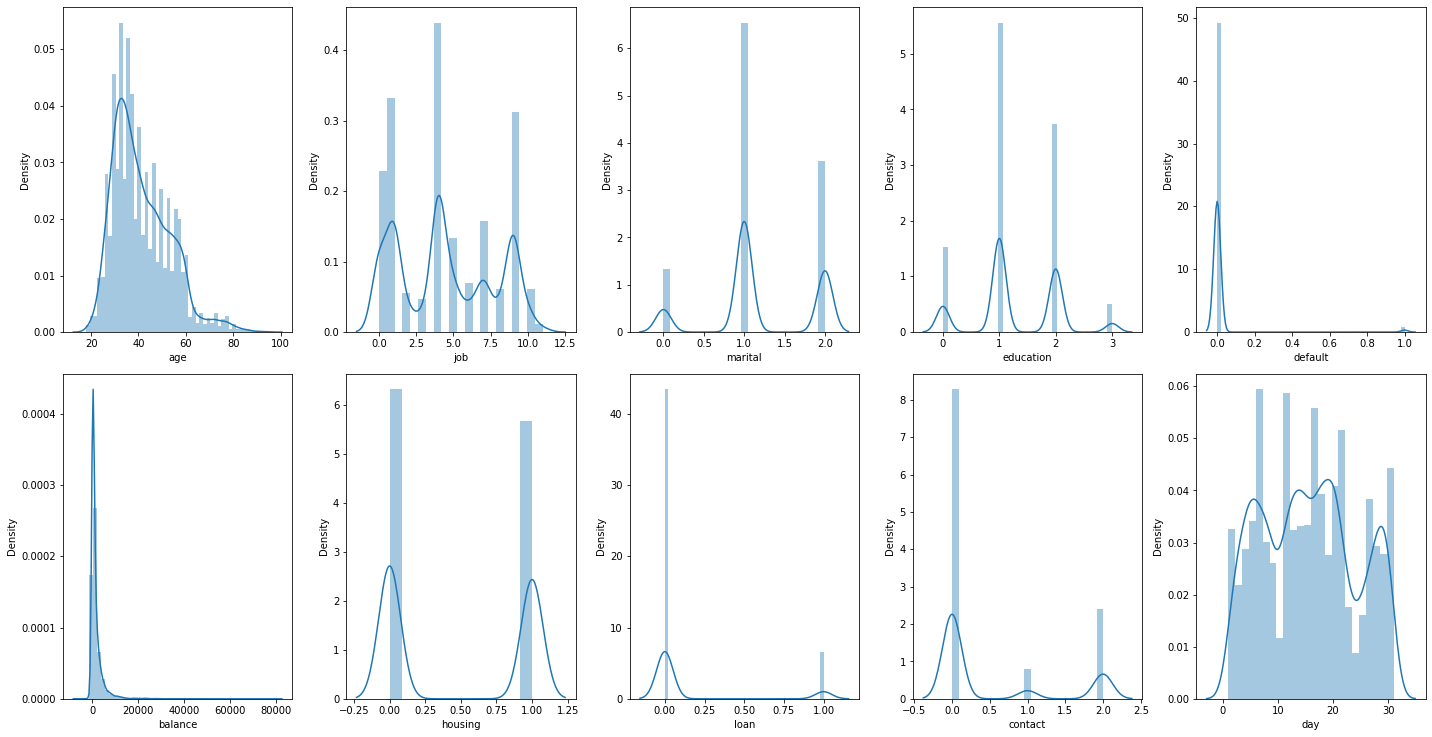

In [15]:
# Validation(Checking) of numerical feature distributions

from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 10:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [16]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [17]:
data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031603,-0.442782,-0.126018,-0.011425,0.112300,-0.168700,-0.031418,0.027762,-0.000762,-0.026130,0.000189,-0.005278,0.002774,0.020169,-0.002699,0.034901
job,-0.031603,1.000000,0.078314,0.147046,-0.007066,0.028736,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.002432,0.003104,-0.003385,0.012665,-0.004238,0.063395
marital,-0.442782,0.078314,1.000000,0.125845,-0.014691,-0.002138,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.006781,-0.030794,0.031200,0.031281,-0.039424,0.067610
education,-0.126018,0.147046,0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.019122,-0.005327,0.025165,0.022427,-0.040262,0.095948
default,-0.011425,-0.007066,-0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,0.000950,-0.009760,0.030975,-0.036282,-0.035273,0.042357,-0.040680
balance,0.112300,0.028736,-0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.007264,0.022436,-0.013894,0.017411,0.030805,-0.027151,0.081129
housing,-0.168700,-0.136965,-0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,0.219602,0.035051,0.006660,0.064497,-0.000840,-0.046370,-0.203888
loan,-0.031418,-0.067092,-0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,0.025329,-0.001914,0.034722,-0.030416,-0.022668,0.026344,-0.110580
contact,0.027762,-0.087915,-0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,0.289803,-0.018000,0.059258,-0.227785,-0.169919,0.257993,-0.249847
day,-0.000762,0.026589,-0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.018511,0.137007,-0.077232,-0.058981,0.080221,-0.056326


In [18]:
data.shape

(11162, 17)

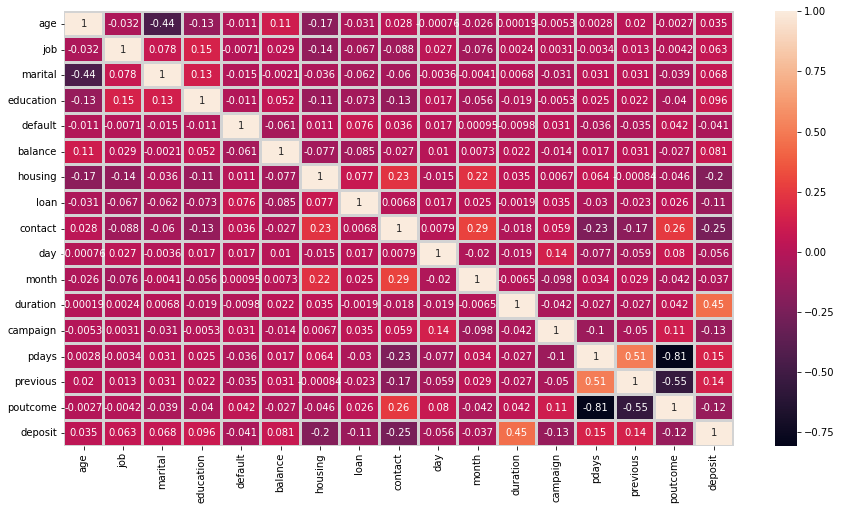

In [19]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize = (15, 8))

sb.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [40]:
x = data[['balance', 'duration', 'pdays','job', 'marital', 'education', 'loan']]

y = data['deposit']

In [41]:
x.shape

(11162, 7)

In [28]:
## Importing Liberies

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [29]:
# encode class values as integers

from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() #create an object of the Label Encoder class
encoder.fit(y)
encoded_Y = encoder.transform(y)


Y = to_categorical(encoded_Y)

Y


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size = 0.2, random_state=0)

x_model, x_val, y_model, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [42]:
## Building the neural network

model = Sequential([

Dense(20, input_dim =7, activation ='relu'),
Dense(2,activation='sigmoid')
])

In [43]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(x_model, y_model, validation_data= (x_val, y_val), epochs=100, batch_size = 25)

Epoch 1/100
286/286 [==============================] - 1s 3ms/step - loss: 25.6917 - accuracy: 0.5549 - val_loss: 2.1297 - val_accuracy: 0.6489
Epoch 2/100
286/286 [==============================] - 1s 2ms/step - loss: 2.1138 - accuracy: 0.6347 - val_loss: 2.2090 - val_accuracy: 0.6193
Epoch 3/100
286/286 [==============================] - 1s 2ms/step - loss: 1.4417 - accuracy: 0.6682 - val_loss: 0.9281 - val_accuracy: 0.6803
Epoch 4/100
286/286 [==============================] - 1s 2ms/step - loss: 1.2138 - accuracy: 0.6769 - val_loss: 2.3081 - val_accuracy: 0.6321
Epoch 5/100
286/286 [==============================] - 1s 3ms/step - loss: 1.2952 - accuracy: 0.6745 - val_loss: 1.1123 - val_accuracy: 0.6837
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 1.5206 - accuracy: 0.6598 - val_loss: 0.9160 - val_accuracy: 0.7122
Epoch 7/100
286/286 [==============================] - 1s 3ms/step - loss: 1.1033 - accuracy: 0.6882 - val_loss: 0.9139 - val_accuracy: 0.716

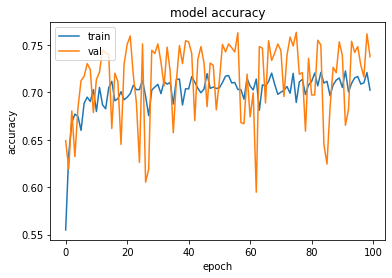

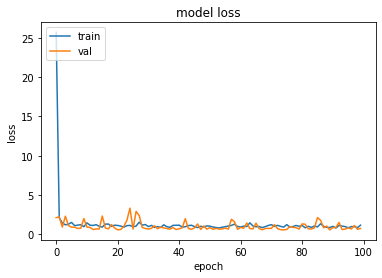

In [44]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
y_pred = model.predict(x_test)

70/70 [==============================] - 0s 2ms/step


In [46]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = []

for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

test = []

for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))


print(f'The accuracy on test data is {accuracy_score(pred,test)}')

The accuracy on test data is 0.7299596954769368
